In [1]:
import math
import pandas as pd
from sklearn.model_selection import train_test_split 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pylab as plt

from dmba import regressionSummary, classificationSummary
from dmba import liftChart, gainsChart

In [2]:
import os
os.chdir("C:\\Users\\alwar\\Documents\\Datascience\\Python\\Lupin_Triglycerides\\dataset")
os.curdir

'.'

In [3]:
tgl= pd.read_csv('train.csv')


In [4]:
tgl.describe()

,age,height_in_cm,weight_in_lbs,left_eyesight_lvl,right_eyesight_lvl,blood_pressure_lvl1,blood_pressure_lvl2,glucose_lvl,total_cholestrol,good_cholestrol_lvl,bad_cholestrol_lvl,hemoglobin_lvl,urea_lvl,creatinine_lvl,liver_enzyme_lvl1,liver_enzyme_lvl2,triglyceride_lvl
count,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,20850.000000,22400.000000
mean,47.586607,162.689286,139.644081,0.982098,0.978196,122.561473,76.120491,100.578304,195.399554,57.216250,113.063616,14.239942,1.097321,0.859469,25.824598,25.636259,130.173438
std,14.167025,9.710639,27.550786,0.613311,0.590100,14.581722,9.921338,24.334669,39.042778,55.983373,47.987373,1.563570,0.445315,0.292106,14.968670,20.521723,84.361161
min,20.000000,125.000000,66.140000,0.100000,0.100000,75.000000,42.000000,51.000000,54.000000,4.000000,1.000000,8.100000,1.000000,0.100000,4.000000,2.000000,1.000000
25%,35.000000,155.000000,121.250000,0.700000,0.700000,112.000000,70.000000,88.000000,169.000000,46.000000,89.000000,13.200000,1.000000,0.700000,19.000000,15.000000,73.000000
50%,45.000000,165.000000,132.280000,1.000000,1.000000,121.000000,76.000000,96.000000,193.000000,55.000000,111.000000,14.300000,1.000000,0.800000,23.000000,20.000000,107.000000
75%,60.000000,170.000000,154.320000,1.200000,1.200000,131.000000,82.000000,105.000000,219.000000,66.000000,135.000000,15.400000,1.000000,1.000000,28.000000,30.000000,159.000000
max,85.000000,200.000000,286.600000,9.900000,9.900000,230.000000,160.000000,468.000000,1619.000000,8110.000000,5119.000000,18.000000,6.000000,16.400000,911.000000,659.000000,500.000000


In [4]:
tgl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22400 entries, 0 to 22399
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   candidate_id         22400 non-null  object 
 1   gender               22400 non-null  object 
 2   age                  22400 non-null  int64  
 3   height_in_cm         22400 non-null  int64  
 4   weight_in_lbs        22400 non-null  float64
 5   left_eyesight_lvl    22400 non-null  float64
 6   right_eyesight_lvl   22400 non-null  float64
 7   can_hear_left_ear    22400 non-null  object 
 8   can_hear_right_ear   22400 non-null  object 
 9   blood_pressure_lvl1  22400 non-null  float64
 10  blood_pressure_lvl2  22400 non-null  float64
 11  glucose_lvl          22400 non-null  float64
 12  total_cholestrol     22400 non-null  float64
 13  good_cholestrol_lvl  22400 non-null  float64
 14  bad_cholestrol_lvl   22400 non-null  float64
 15  hemoglobin_lvl       22400 non-null 

In [5]:
tgl1=tgl[['age','gender','height_in_cm','weight_in_lbs','glucose_lvl','smoking_habit', 'triglyceride_lvl']]
tgl2=pd.get_dummies(tgl1)
tgl2.keys()



Index(['age', 'height_in_cm', 'weight_in_lbs', 'glucose_lvl',
       'triglyceride_lvl', 'gender_Female', 'gender_Male',
       'smoking_habit_Chain Smoker', 'smoking_habit_Does not Smoke',
       'smoking_habit_Occassionaly Smokes'],
      dtype='object')

In [6]:

# partition data
X = tgl2[['age', 'height_in_cm', 'weight_in_lbs', 'glucose_lvl', 'gender_Female', 'gender_Male','smoking_habit_Chain Smoker', 'smoking_habit_Does not Smoke','smoking_habit_Occassionaly Smokes']]
y = tgl2['triglyceride_lvl']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4,random_state=1)


In [57]:

# train linear regression model
reg = LinearRegression()
reg.fit(train_X, train_y)


LinearRegression()

In [8]:

# evaluate performance
# training
regressionSummary(train_y, reg.predict(train_X))
# validation
regressionSummary(valid_y, reg.predict(valid_X))


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 69.4138
            Mean Absolute Error (MAE) : 50.6619
          Mean Percentage Error (MPE) : -20.2345
Mean Absolute Percentage Error (MAPE) : 45.8671

Regression statistics

                      Mean Error (ME) : -0.4420
       Root Mean Squared Error (RMSE) : 67.0992
            Mean Absolute Error (MAE) : 49.5826
          Mean Percentage Error (MPE) : -20.0062
Mean Absolute Percentage Error (MAPE) : 45.4933


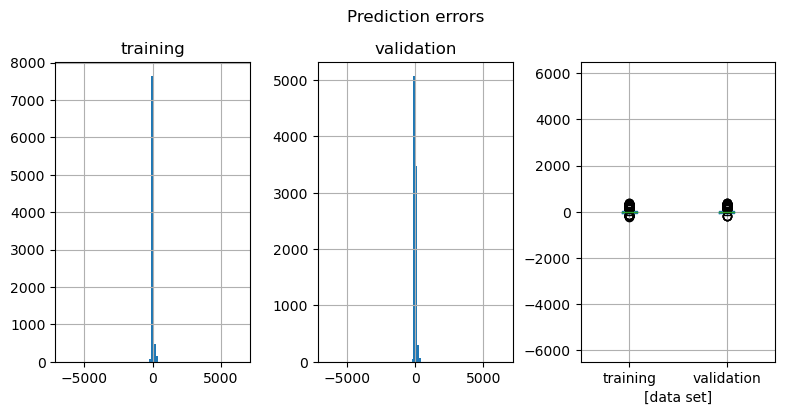

In [9]:


pred_error_train = pd.DataFrame({
    'residual': train_y - reg.predict(train_X), 
    'data set': 'training'
})
pred_error_valid = pd.DataFrame({
    'residual': valid_y - reg.predict(valid_X), 
    'data set': 'validation'
})
boxdata_df = pd.concat([pred_error_train, pred_error_valid], ignore_index=True)

fig, axes = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(9, 4)
common = {'bins': 100, 'range': [-6500, 6500]}
pred_error_train.hist(ax=axes[0], **common)
pred_error_valid.hist(ax=axes[1], **common)
boxdata_df.boxplot(ax=axes[2], by='data set')

axes[0].set_title('training')
axes[1].set_title('validation')
axes[2].set_title(' ')
axes[2].set_ylim(-6500, 6500)
plt.suptitle('Prediction errors')
 
plt.subplots_adjust(bottom=0.1, top=0.85, wspace=0.35)
plt.show()

In [10]:
tgl1.keys()

Index(['age', 'gender', 'height_in_cm', 'weight_in_lbs', 'glucose_lvl',
       'smoking_habit', 'triglyceride_lvl'],
      dtype='object')

In [12]:
corr=tgl2.corr()


In [21]:
corr.infer_objects

<bound method NDFrame.infer_objects of                                         age  height_in_cm  weight_in_lbs  \
age                                1.000000     -0.417066      -0.202553   
height_in_cm                      -0.417066      1.000000       0.533392   
weight_in_lbs                     -0.202553      0.533392       1.000000   
glucose_lvl                        0.199370     -0.054129       0.139095   
triglyceride_lvl                   0.059900     -0.143174       0.322718   
gender_Female                      0.081868     -0.614250      -0.581513   
gender_Male                       -0.081868      0.614250       0.581513   
smoking_habit_Chain Smoker        -0.156818      0.255767       0.243830   
smoking_habit_Does not Smoke       0.060503     -0.362110      -0.357314   
smoking_habit_Occassionaly Smokes  0.084136      0.208519       0.211328   

                                   glucose_lvl  triglyceride_lvl  \
age                                   0.199370          

In [13]:
import seaborn as sns

<Axes: >

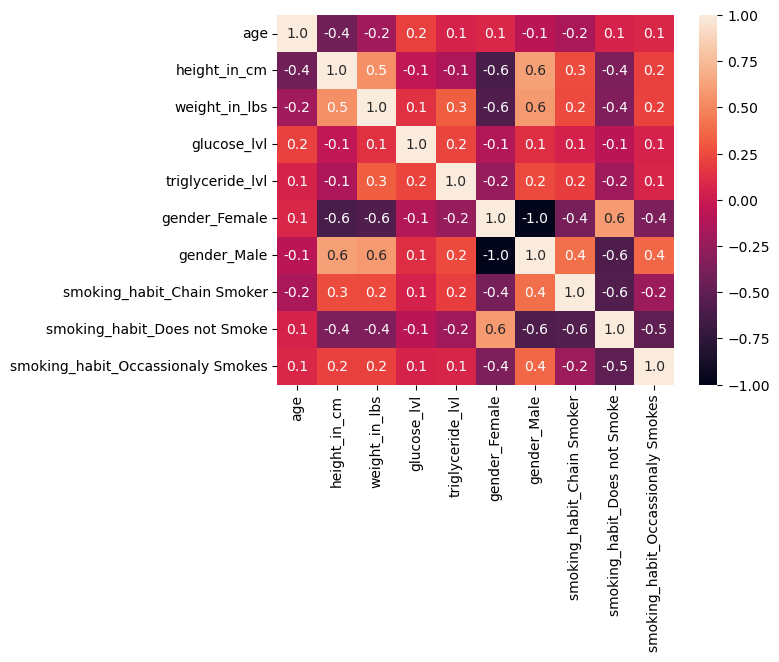

In [31]:
sns.heatmap(corr,mask=False,cbar_kws=None,annot=True,fmt=".1f")

In [35]:
tgl.keys()
imp=tgl[['bad_cholestrol_lvl','good_cholestrol_lvl','total_cholestrol','glucose_lvl','hemoglobin_lvl','urea_lvl','creatinine_lvl','liver_enzyme_lvl1','liver_enzyme_lvl2','age','weight_in_lbs']]

<Axes: >

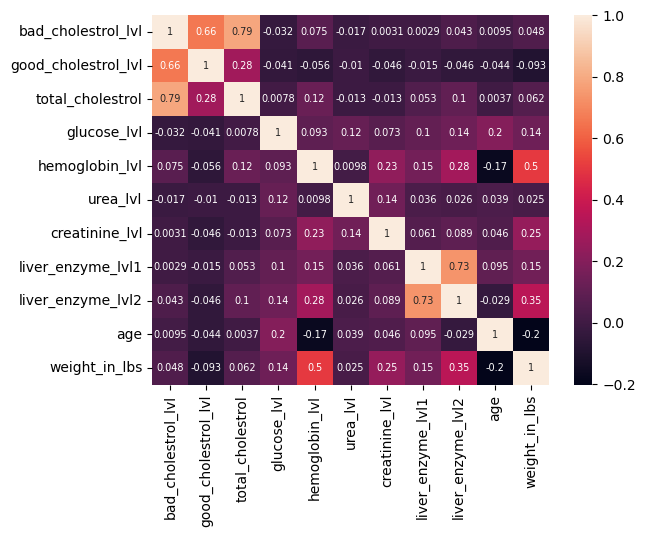

In [74]:
corr1=imp.corr()
sns.heatmap(corr1,annot=True,annot_kws={"size":7})